In [25]:
using PyPlot
using JuMP, Ipopt

In [26]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

include("../src/stochastic_emissions.jl");

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["lines.linestyle"] = "-";

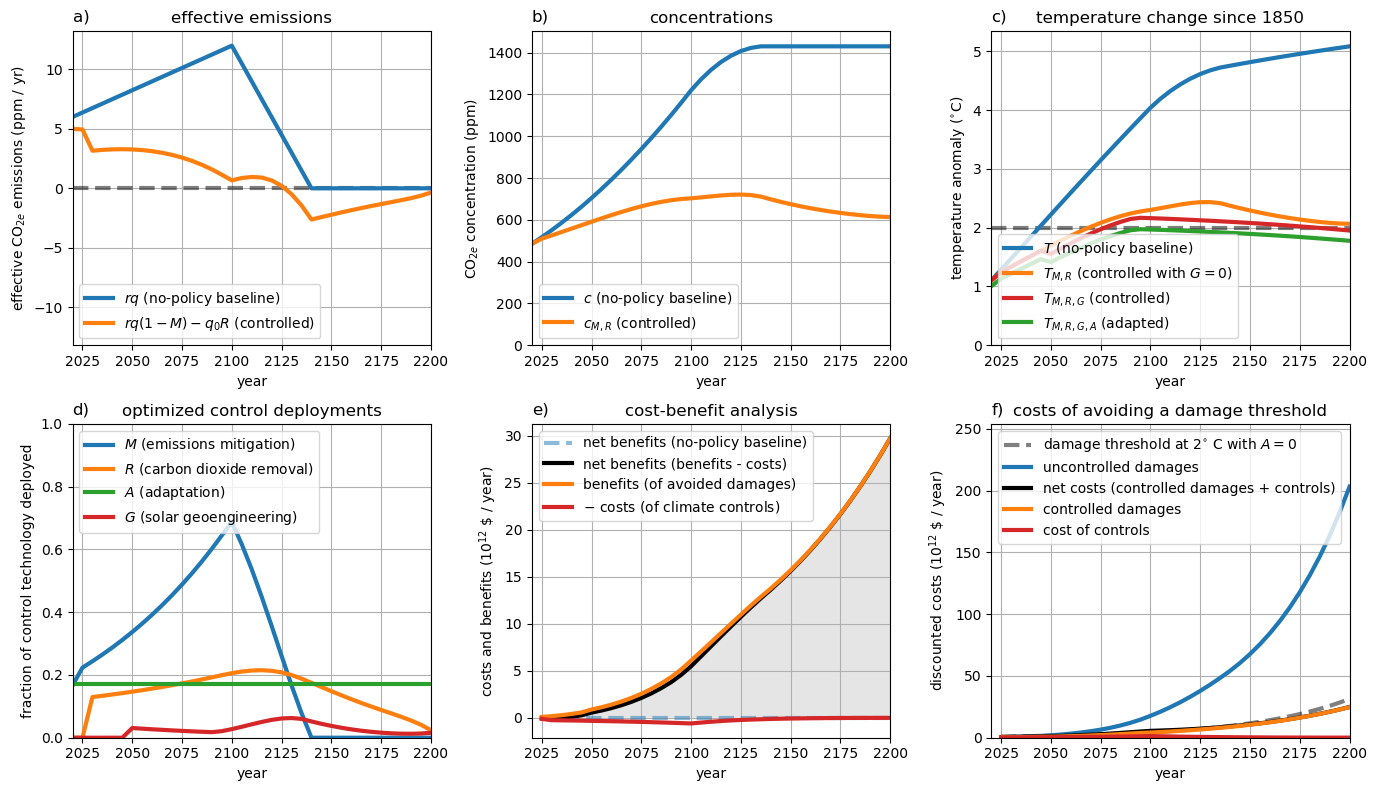

In [27]:
ensemble = Dict()
Δt = 10.

model = ClimateModel();
optimize_controls!(model);
ensemble[string(Int64(model.present_year))] = deep_copy(model);
plot_state(model);

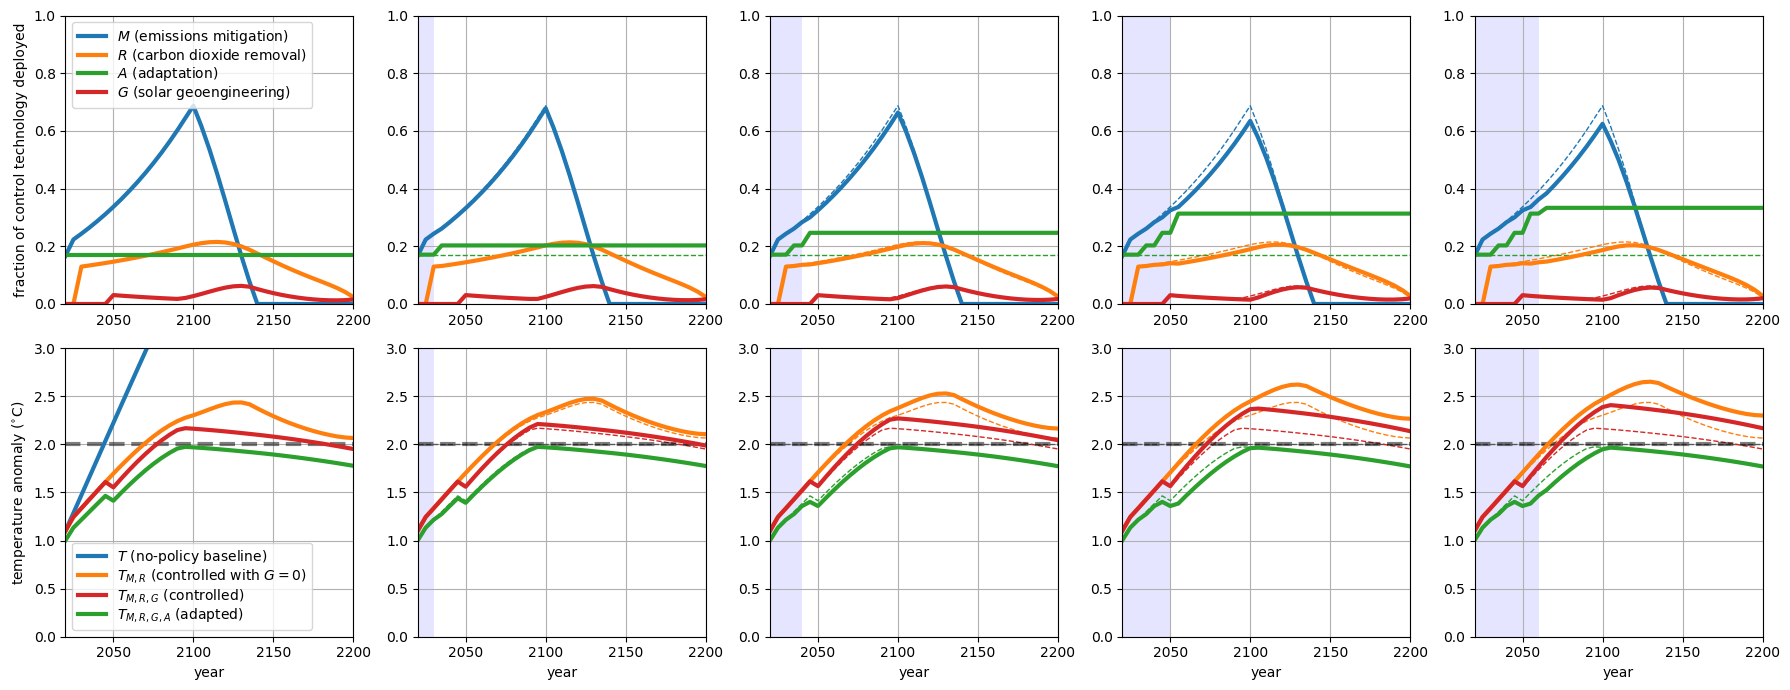

In [28]:
previous_year = deepcopy(model.present_year)

figure(figsize=(18,7))
plot_legends = true

subplot(2,5,1)
rcParams["lines.linestyle"] = "-"
rcParams["lines.linewidth"] = 3.0
plot_controls(model)
legend(loc="upper left", labelspacing=0.1)
xlabel("")
title("")

subplot(2,5,6)
rcParams["lines.linestyle"] = "-"
plot_temperatures(model)
ylim([0,3.])
legend(loc="lower left", labelspacing=0.1)
tight_layout()
title("")

for step in 1:4
    step_forward!(model, Δt)
    optimize_controls!(model);

    subplot(2,5,1+step)
    rcParams["lines.linestyle"] = "--"  
    rcParams["lines.linewidth"] = 1.0
    plot_controls(ensemble["2020"])
    rcParams["lines.linestyle"] = "-"
    rcParams["lines.linewidth"] = 3.0
    plot_controls(model)
    xlabel("")
    ylabel("")
    title("")
    
    subplot(2,5,6+step)
    rcParams["lines.linestyle"] = "--"
    rcParams["lines.linewidth"] = 1.0
    plot_temperatures(ensemble["2020"], hide_baseline=true)
    rcParams["lines.linestyle"] = "-"
    rcParams["lines.linewidth"] = 3.0
    plot_temperatures(model, hide_baseline=true)
    ylim([0,3.])
    ylabel("")
    title("")
    
    ensemble[model.name] = deep_copy(model);
    
    previous_year = deepcopy(model.present_year)
end

tight_layout()
savefig("../figures/policy-update_control.png", bbox_inches="tight", dpi=100)